In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('./fake_news.csv')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.1, random_state = 42)

In [5]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

names = vectorizer.get_feature_names_out()
scores = X_train.toarray()[0]
sorted_features = [feature for _, feature in sorted(zip(scores, names), reverse=True)]

In [38]:
model = PassiveAggressiveClassifier(C = 0.5, random_state=42)

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
print(f"Точность: {accuracy_score(y_test, test_pred)}")

Точность: 0.9369085173501577


Text(0.5, 1.0, 'Матрица ошибок')

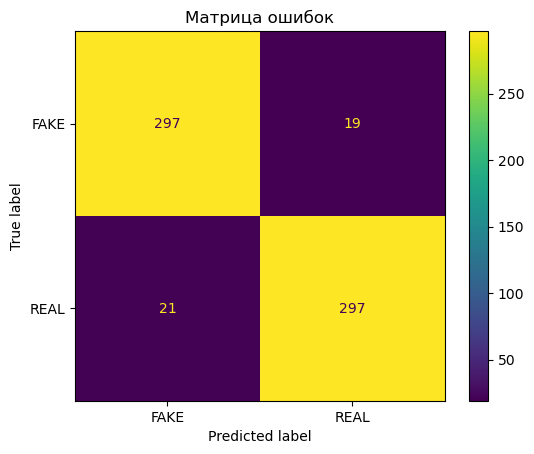

In [42]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, ax=ax)
ax.set_title("Матрица ошибок")